# Data Exploration and Analysis

## 1. Reading the data

If the data is in the zip file format then use the below code, else skip this section

In [2]:
# Importing libraries
import os
import zipfile
import requests

In [ ]:
# Defining the function to dowload the data
def download_data(url, name, path='data'):
    
    if not os.path.exists(path):
        os.mkdir(path)
    response = requests.get(url)
    
    with open(os.path.join(path, name), 'wb') as f:
        f.write(response.content)
    z = zipfile.ZipFile(os.path.join(path, name))
    z.extractall(path)

In [ ]:
# Calling the above function as an example
VEHICLES = 'http://bit.ly/ddl-cars'
download_data(VEHICLES, 'vehicles.zip')

If you already have extracted files in csv, excel, json or any other format then you can directly load the data in pandas dataframe by skipping the above step

In [3]:
# loading the data in pandas dataframe
import pandas as pd

path = 'data'
vehicles = pd.read_csv(os.path.join(path, 'vehicles.csv'))

C:\Users\Akanksha_PC\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<b>Let's check how the data looks like and summarize it</b>

In [ ]:
#print the data size in rows x columns
vehicles.shape

83 columns is a big number, i am sure not all columns will be of our use. So, later i am gonna reduce it. Number of rows are quite less in number so that's good for beginner's.<br/>
Let's check out what all columns do we have and which one we can get rid of.

In [ ]:
vehicles.columns

In [ ]:
vehicles.dtypes

In [ ]:
vehicles.describe().transpose()

In [ ]:
# Get number of missing values for columns
vehicles.isnull().sum()
# or use
#df.isnull().sum(axis = 0)

# If you want to get number of missing values for rows by any chance
#df.isnull().sum(axis = 1)

In [4]:
# Select required columns
select_columns = ['make', 'model', 'year', 'displ', 'cylinders', 'trany', 'drive', 'VClass','fuelType','barrels08', 'city08'
                  , 'highway08', 'comb08', 'co2TailpipeGpm', 'fuelCost08']
#vehicles = vehicles[select_columns][vehicles.year <= 2016].drop_duplicates().dropna()
vehicles = vehicles[select_columns].sort_values(['make', 'model', 'year']).drop_duplicates().dropna()
vehicles.head()

,make,model,year,displ,cylinders,trany,drive,VClass,fuelType,barrels08,city08,highway08,comb08,co2TailpipeGpm,fuelCost08
19316,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
19314,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
358,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
369,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
25797,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [ ]:
# !!! DO NOT RUN THIS CELL UNTILL NEEDED !!!

# In case, if number of columns to drop is less in number then it is good idea to list down the columns to drop instead of 
# selecting columns

del_col_list = ['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A']
vehicles_with_drop = vehicles.drop(del_col_list, axis=1)

In [ ]:
# !!! DO NOT RUN THIS CELL UNTILL NEEDED !!!

# Sometimes we have 0 instead of null or missing values so we need to first replace it with np.nan and then remove it from df

cols = ['co2TailpipeGpm', 'fuelCost08']
vehicles[cols] = vehicles[cols].replace(0, np.nan)
vehicles.dropna(subset=cols, inplace=True)

In [5]:
# Renaming column names to be intuitive, to make more sense later on
vehicles.columns = ['Make','Model','Year','Engine Displacement','Cylinders',
                    'Transmission','Drivetrain','Vehicle Class','Fuel Type',
                    'Fuel Barrels/Year','City MPG','Highway MPG','Combined MPG',
                    'CO2 Emission Grams/Mile','Fuel Cost/Year']

In [ ]:
# For categorizing the data we need to now column data type and in categorical fields how many unique values we are dealing with.
def unique_col_values(df):
    for column in df:
        print("{} | {} | {}".format(
            df[column].name, len(df[column].unique()), df[column].dtype
        ))

unique_col_values(vehicles)

In [7]:
# For instance, Transmission Type can be either Automatic or Manual from data set so we do not want 43 categories but just 2 can work
AUTOMATIC = "Automatic"
MANUAL = "Manual"

vehicles.loc[vehicles['Transmission'].str.startswith('A'),
             'Transmission Type'] = AUTOMATIC

vehicles.loc[vehicles['Transmission'].str.startswith('M'),
             'Transmission Type'] = MANUAL

In [6]:
# Similarly when we check the values of column vehicle type, we can categorize it into lesser number as small cars, midsize cars,
# large cars, sports car, station wagons, special purpose cars, vans and mini vans and so on as per your requirement
small = ['Compact Cars','Subcompact Cars','Two Seaters','Minicompact Cars']
midsize = ['Midsize Cars']
large = ['Large Cars']

vehicles.loc[vehicles['Vehicle Class'].isin(small), 
             'Vehicle Category'] = 'Small Cars'

vehicles.loc[vehicles['Vehicle Class'].isin(midsize), 
             'Vehicle Category'] = 'Midsize Cars'

vehicles.loc[vehicles['Vehicle Class'].isin(large), 
             'Vehicle Category'] = 'Large Cars'

vehicles.loc[vehicles['Vehicle Class'].str.contains('Station'), 
             'Vehicle Category'] = 'Station Wagons'

vehicles.loc[vehicles['Vehicle Class'].str.contains('Truck'), 
             'Vehicle Category'] = 'Pickup Trucks'

vehicles.loc[vehicles['Vehicle Class'].str.contains('Special Purpose'), 
             'Vehicle Category'] = 'Special Purpose'

vehicles.loc[vehicles['Vehicle Class'].str.contains('Sport Utility'), 
             'Vehicle Category'] = 'Sport Utility'

vehicles.loc[(vehicles['Vehicle Class'].str.lower().str.contains('van')),
             'Vehicle Category'] = 'Vans & Minivans'

In [8]:
'''
Now let's take a look at make and model, the unique values are a lot and there is no way we can reduce it's number using above
method. So we need to change the strategy by combining make and model and then extract common value. For instance,
categorize all Chevrolet Suburban C1500 2WD vehicles and all Chevrolet Suburban K1500 4WD vehicles as Chevrolet Suburbans.
'''
vehicles['Model Type'] = (vehicles['Make'] + " " +vehicles['Model'].str.split().str.get(0))

In [9]:
# Finally lets look at the fuel type. Oh i am so sorry, i never mentioned, how to look at those values. My bad, here you go!!!

vehicles['Fuel Type'].unique()

array(['Regular', 'Premium', 'Diesel', 'Premium and Electricity',
       'Premium or E85', 'Premium Gas or Electricity', 'Gasoline or E85',
       'Gasoline or natural gas', 'CNG', 'Regular Gas or Electricity',
       'Midgrade', 'Regular Gas and Electricity', 'Gasoline or propane'], dtype=object)

In [10]:
# As you see this particular field is a bit complex as some models are combination of fuel types. So lets check the distribution
# No, no, no, don't get excited, no graphs yet... I will create binary fields for 5 major categories for now

# Initialize these 5 new fields with 0
vehicles['Gas'] = 0
vehicles['Ethanol'] = 0
vehicles['Electric'] = 0
vehicles['Propane'] = 0
vehicles['Natural Gas'] = 0

vehicles.loc[vehicles['Fuel Type'].str.contains(
        'Regular|Gasoline|Midgrade|Premium|Diesel'),'Gas'] = 1

vehicles.loc[vehicles['Fuel Type'].str.contains('E85'),'Ethanol'] = 1

vehicles.loc[vehicles['Fuel Type'].str.contains('Electricity'),'Electric'] = 1

vehicles.loc[vehicles['Fuel Type'].str.contains('propane'),'Propane'] = 1

vehicles.loc[vehicles['Fuel Type'].str.contains('natural|CNG'),'Natural Gas'] = 1

In [12]:
ft = ['Gas', 'Ethanol', 'Electric', 'Propane', 'Natural Gas']
vehicles[ft].sum()

Gas            35892
Ethanol         1316
Electric          55
Propane            8
Natural Gas       80
dtype: int64

In [13]:
# As you see 99% of data has fuel type Gas, so now lets categorize it under new column Gas type as,
vehicles.loc[vehicles['Fuel Type'].str.contains(
        'Regular|Gasoline'),'Gas Type'] = 'Regular'

vehicles.loc[vehicles['Fuel Type'] == 'Midgrade',
             'Gas Type'] = 'Midgrade'

vehicles.loc[vehicles['Fuel Type'].str.contains('Premium'),
             'Gas Type'] = 'Premium'

vehicles.loc[vehicles['Fuel Type'] == 'Diesel',
             'Gas Type'] = 'Diesel'

vehicles.loc[vehicles['Fuel Type'].str.contains('natural|CNG'),
             'Gas Type'] = 'Natural'

In [14]:
# Since we are done with categorical fields, let's categorize continuous variables. These can be binned either by using some
# threshold value or distribution. But quantile is the best way to bin continuous variables as it clearly describes the statistics.
# Here, there are 4 fields that can be binned using the quantile method. Let's rock and roll !!!

# Let's look at the statistics of these 4 variables
con_var = ['Engine Displacement','Combined MPG','CO2 Emission Grams/Mile','Fuel Cost/Year']
vehicles[con_var].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Engine Displacement,35952.0,3.338493,1.359395,0.6,2.2,3.000000,4.3000,8.400000
Combined MPG,35952.0,19.929322,5.112409,7.0,16.0,19.000000,23.0000,56.000000
CO2 Emission Grams/Mile,35952.0,475.316339,119.060773,37.0,395.0,467.736842,555.4375,1269.571429
Fuel Cost/Year,35952.0,1892.598465,506.958627,600.0,1500.0,1850.000000,2200.0000,5800.000000


In [15]:
# I am categorizing it into 5 bins. I am not overwriting any original field values. Its good to create new variables and this is
# called feature engineering
efficiency_categories = ['Very Low Efficiency', 'Low Efficiency','Moderate Efficiency','High Efficiency','Very High Efficiency']
vehicles['Fuel Efficiency'] = pd.qcut(vehicles['Combined MPG'], 5, efficiency_categories)

engine_categories = ['Very Small Engine', 'Small Engine','Moderate Engine','Large Engine', 'Very Large Engine']
vehicles['Engine Size'] = pd.qcut(vehicles['Engine Displacement'], 5, engine_categories)

emission_categories = ['Very Low Emissions', 'Low Emissions','Moderate Emissions','High Emissions','Very High Emissions']
vehicles['Emissions'] = pd.qcut(vehicles['CO2 Emission Grams/Mile'], 5, emission_categories)

fuelcost_categories = ['Very Low Fuel Cost', 'Low Fuel Cost','Moderate Fuel Cost','High Fuel Cost','Very High Fuel Cost']
vehicles['Fuel Cost'] = pd.qcut(vehicles['Fuel Cost/Year'], 5, fuelcost_categories)

In [16]:
# Last step in Data Prep process i am going to use is clustering. This is useful as it combines variables which are not similar
# as in cases above and may contain some pattern which is not visible to me right now. This can be performed on numerical fields only
# as it works on distance calculation. So let's identify those fields and put them together for MAGIC !!!
cluster_columns = ['Engine Displacement','Cylinders','Fuel Barrels/Year','City MPG','Highway MPG','Combined MPG',
                   'CO2 Emission Grams/Mile', 'Fuel Cost/Year']

In [17]:
# Scaling the features for cluster columns. Using MaxAbsScaler, it will divide each value by the max absolute value for that 
# feature. This will preserve the distributions in the data and convert the values in each field to a number between 0 and 1, 
# technically -1 and 1, but we don't have any negatives
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler()

vehicle_clusters = scaler.fit_transform(vehicles[cluster_columns])
vehicle_clusters = pd.DataFrame(vehicle_clusters, columns=cluster_columns)

In [18]:
# Using k-means clustering algorithm
from sklearn.cluster import KMeans

def kmeans_cluster(df, n_clusters=2):
    model = KMeans(n_clusters=n_clusters, random_state=1)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

In [19]:
# Count the number of vehicles that fall into each cluster and calculate the cluster means for each feature.
def summarize_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    return cluster_summary

In [20]:
cluster_results = kmeans_cluster(vehicle_clusters, 8)
cluster_summary = summarize_clustering(cluster_results)

In [21]:
cluster_summary

,Cluster,Count,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,0,3046,0.595648,0.500410,0.395563,0.262996,0.361221,0.315930,0.399871,0.364067
1,1,6590,0.241782,0.254401,0.280666,0.384004,0.488408,0.448160,0.280622,0.240504
2,2,1737,0.683088,0.572755,0.600508,0.178677,0.235567,0.210605,0.600256,0.543858
3,3,1907,0.200246,0.244494,0.214851,0.520171,0.617802,0.589464,0.216191,0.182906
4,4,7946,0.383006,0.374921,0.352957,0.298057,0.406046,0.356583,0.352961,0.314719
5,5,4020,0.632608,0.502705,0.495146,0.218339,0.282175,0.255570,0.495325,0.423019
6,6,4800,0.447215,0.373477,0.437691,0.249612,0.310290,0.287299,0.437669,0.371018
7,7,5906,0.267454,0.253905,0.345683,0.314925,0.392535,0.363894,0.345621,0.298335


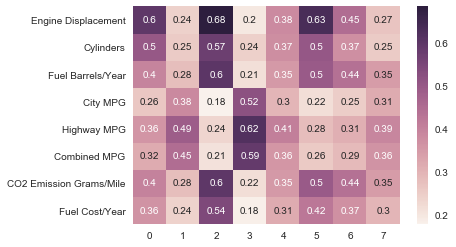

In [23]:
# Other than count rest of the summary is like reading Spanish to me (Lolz). So, voila !!! let's plot it to understand it.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(cluster_summary[cluster_columns].transpose(), annot=True)

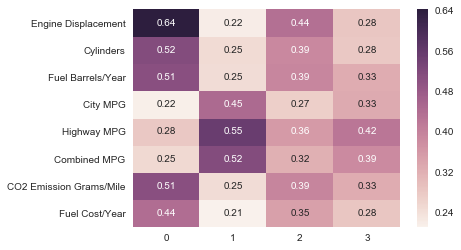

In [24]:
# From the above plot we can clearly see that few clusters are same such as, 0, 2 and 5, 1 and 7, and 4 and 6
# This means we can reduce the number of clusters for sure
cluster_results = kmeans_cluster(vehicle_clusters, 4)
cluster_summary = summarize_clustering(cluster_results)

sns.heatmap(cluster_summary[cluster_columns].transpose(), annot=True)

In [25]:
# Now the clusters look good but this 0, 1, 2, 3 doesn't make any sense. Let's give these clusters some sensible names
cluster_results['Cluster Name'] = ''
cluster_results['Cluster Name'][cluster_results['Cluster']==3] = 'Midsized Balanced'
cluster_results['Cluster Name'][cluster_results['Cluster']==0] = 'Large Inefficient'
cluster_results['Cluster Name'][cluster_results['Cluster']==2] = 'Large Moderately Efficient'
cluster_results['Cluster Name'][cluster_results['Cluster']==1] = 'Small Very Efficient'

vehicles = vehicles.reset_index().drop('index', axis=1)
vehicles['Cluster Name'] = cluster_results['Cluster Name']

C:\Users\Akanksha_PC\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Akanksha_PC\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Akanksha_PC\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Akanksha_PC\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value i

In [33]:
# function to aggregate based on a group_field. This will help in analysing the variables.
def agg_count(df, group_field):
    grouped = df.groupby(group_field, as_index=False).size()
    #grouped.sort_values(ascending = False)

    grouped = pd.DataFrame(grouped).reset_index()
    grouped.columns = [group_field, 'Count']
    return grouped.sort_values('Count', ascending = False)

### Univariate Analysis

In [34]:
# Insight 1 - Get the number of vehicles in each category that were manufactured in 2016
vehicles_2016 = vehicles[vehicles['Year']==2016]
category_counts = agg_count(vehicles_2016, 'Vehicle Category')
category_counts

,Vehicle Category,Count
3,Small Cars,440
5,Sport Utility,319
1,Midsize Cars,201
0,Large Cars,100
2,Pickup Trucks,83
6,Station Wagons,44
4,Special Purpose,24
7,Vans & Minivans,17


C:\Users\Akanksha_PC\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Vehicles Manufactured by Category (2016) \n')

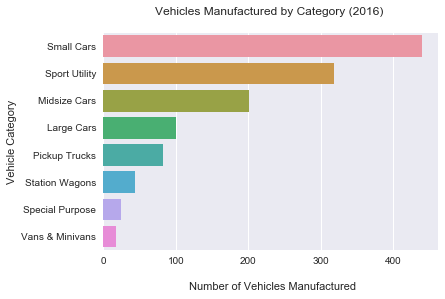

In [35]:
# Visually
ax = sns.barplot(data=category_counts, x='Count', y='Vehicle Category')
ax.set(xlabel='\n Number of Vehicles Manufactured')
sns.plt.title('Vehicles Manufactured by Category (2016) \n')

C:\Users\Akanksha_PC\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Vehicles Manufactured by Category (1985) \n')

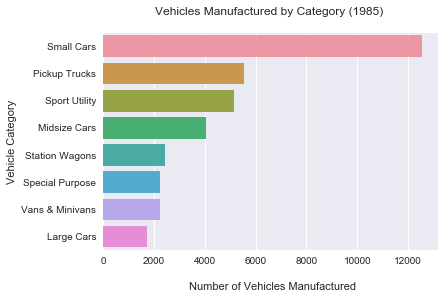

In [36]:
# Compairing the above distribution with year 1985
vehicles_1985 = vehicles[vehicles['Year']==1985]
category_counts = agg_count(vehicles, 'Vehicle Category')

ax = sns.barplot(data=category_counts, x='Count', y='Vehicle Category')
ax.set(xlabel='\n Number of Vehicles Manufactured')
sns.plt.title('Vehicles Manufactured by Category (1985) \n')

C:\Users\Akanksha_PC\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Vehicles Manufactured by Class (2016) \n')

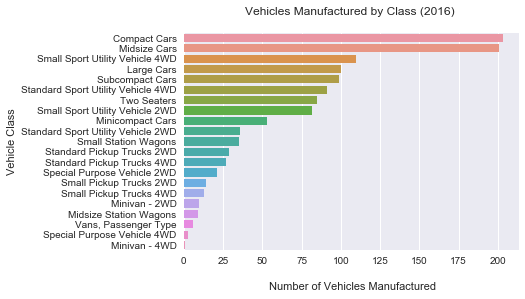

In [37]:
class_counts = agg_count(vehicles_2016, 'Vehicle Class')

ax = sns.barplot(data=class_counts, x='Count', y='Vehicle Class')
ax.set(xlabel='\n Number of Vehicles Manufactured')
sns.plt.title('Vehicles Manufactured by Class (2016) \n')

C:\Users\Akanksha_PC\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Vehicles Manufactured by Make (2016) \n')

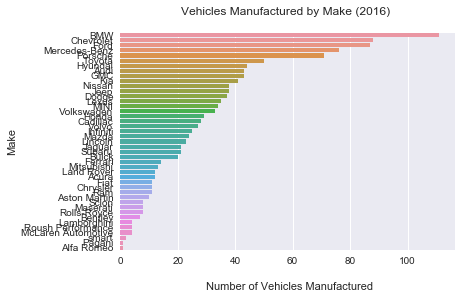

In [38]:
make_counts = agg_count(vehicles_2016, 'Make')

ax = sns.barplot(data=make_counts, x='Count', y='Make')
ax.set(xlabel='\n Number of Vehicles Manufactured')
sns.plt.title('Vehicles Manufactured by Make (2016) \n')

C:\Users\Akanksha_PC\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Very Fuel Efficient Vehicles by Make \n')

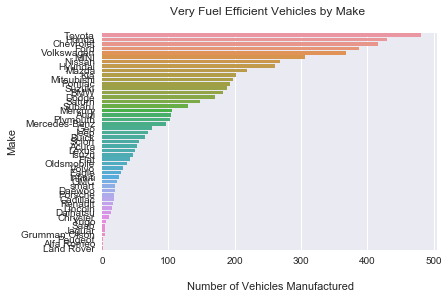

In [39]:
very_efficient = vehicles[vehicles['Fuel Efficiency']=='Very High Efficiency']
make_counts = agg_count(very_efficient, 'Make')

ax = sns.barplot(data=make_counts, x='Count', y='Make')
ax.set(xlabel='\n Number of Vehicles Manufactured')
sns.plt.title('Very Fuel Efficient Vehicles by Make \n')

In [42]:
# Let's perform some other calculation, such as averaging, instead of counting the number of records that fall into each group?
def agg_avg(df, group_field, calc_field):
    grouped = df.groupby(group_field, as_index=False)[calc_field].mean()
    grouped = grouped.sort_values(calc_field, ascending = False)
    grouped.columns = [group_field, 'Avg ' + str(calc_field)]
    return grouped

C:\Users\Akanksha_PC\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Average Combined MPG by Category (2016) \n')

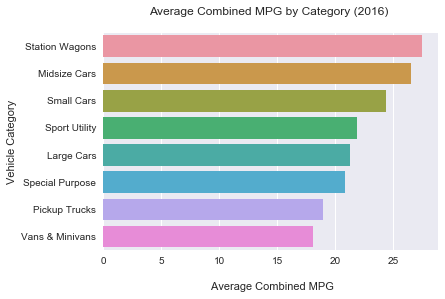

In [43]:
category_avg_mpg = agg_avg(vehicles_2016, 'Vehicle Category', 'Combined MPG')

ax = sns.barplot(data=category_avg_mpg, x='Avg Combined MPG', y='Vehicle Category')
ax.set(xlabel='\n Average Combined MPG')
sns.plt.title('Average Combined MPG by Category (2016) \n')

### Multivariate Analysis

In [46]:
# Let's analyse 2-3 variables together
import numpy as np

def pivot_count(df, rows, columns, calc_field):
    df_pivot = df.pivot_table(values=calc_field, 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    return df_pivot

In [47]:
effic_size_pivot = pivot_count(vehicles_2016,'Fuel Efficiency','Engine Size','Combined MPG')
effic_size_pivot

Engine Size,Very Small Engine,Small Engine,Moderate Engine,Large Engine,Very Large Engine
Fuel Efficiency,,,,,
Very Low Efficiency,NaN,NaN,4.0,23.0,72.0
Low Efficiency,NaN,NaN,18.0,49.0,81.0
Moderate Efficiency,4.0,11.0,105.0,112.0,22.0
High Efficiency,56.0,45.0,123.0,33.0,1.0
Very High Efficiency,346.0,85.0,38.0,NaN,NaN


Text(0.5,1,'Fuel Efficiency vs. Engine Size (2016) \n')

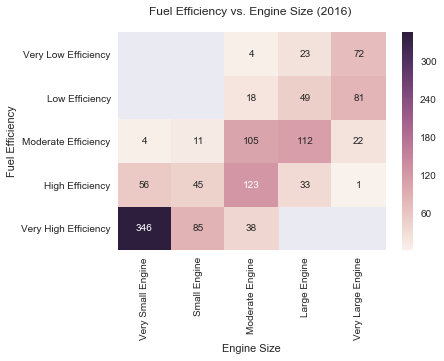

In [48]:
# As again above numbers are boring and not intuitive, i will create a heatmap to understand it better.

sns.heatmap(effic_size_pivot, annot=True, fmt='g')
ax.set(xlabel='\n Engine Size')
sns.plt.title('Fuel Efficiency vs. Engine Size (2016) \n')

Text(0.5,1,'Fuel Efficiency vs. Engine Size (1985) \n')

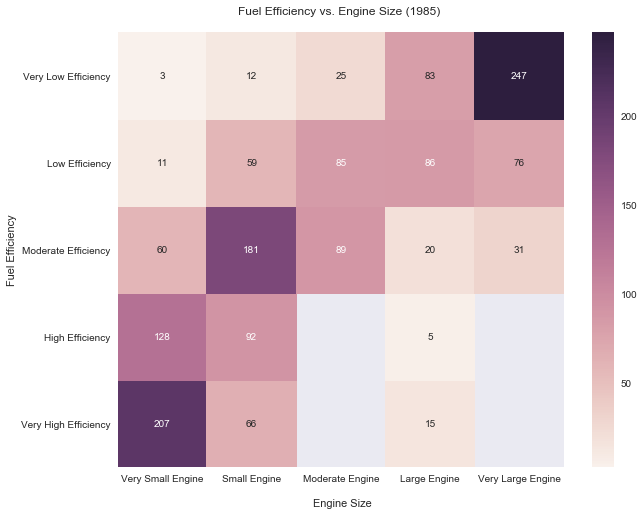

In [50]:
effic_size_pivot = pivot_count(vehicles_1985,'Fuel Efficiency','Engine Size','Combined MPG')

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(effic_size_pivot, annot=True, fmt='g')
ax.set(xlabel='\n Engine Size')
sns.plt.title('Fuel Efficiency vs. Engine Size (1985) \n')

Text(0.5,1,'Fuel Efficiency + Engine Size vs. Vehicle Category (2016) \n')

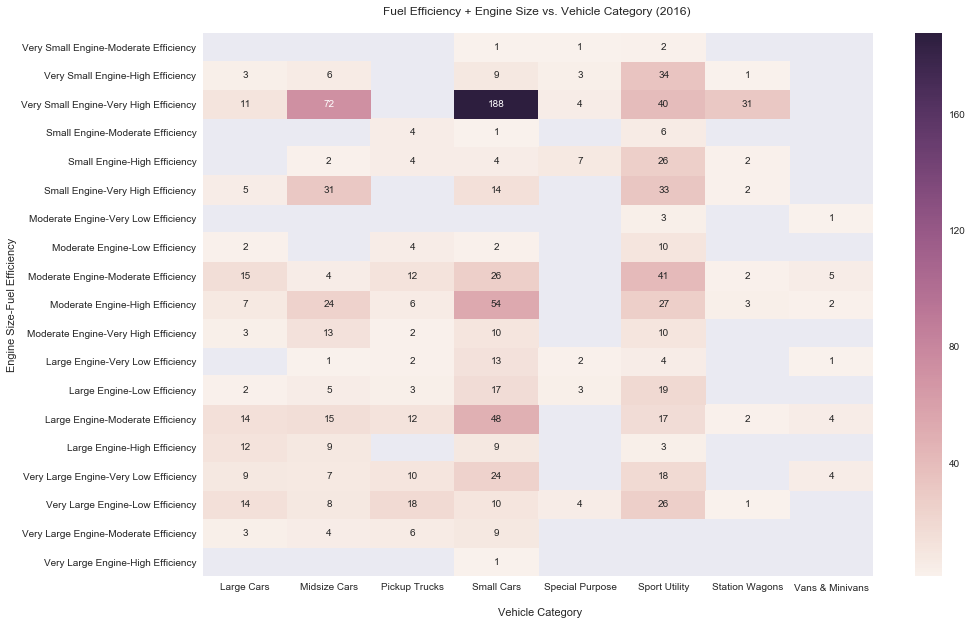

In [51]:
effic_size_category = pivot_count(vehicles_2016,['Engine Size','Fuel Efficiency'],'Vehicle Category','Combined MPG')

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(effic_size_category, annot=True, fmt='g')
ax.set(xlabel='\n Vehicle Category')
sns.plt.title('Fuel Efficiency + Engine Size vs. Vehicle Category (2016) \n')

Text(0.5,1,'Make vs. Vehicle Category (2016) \n')

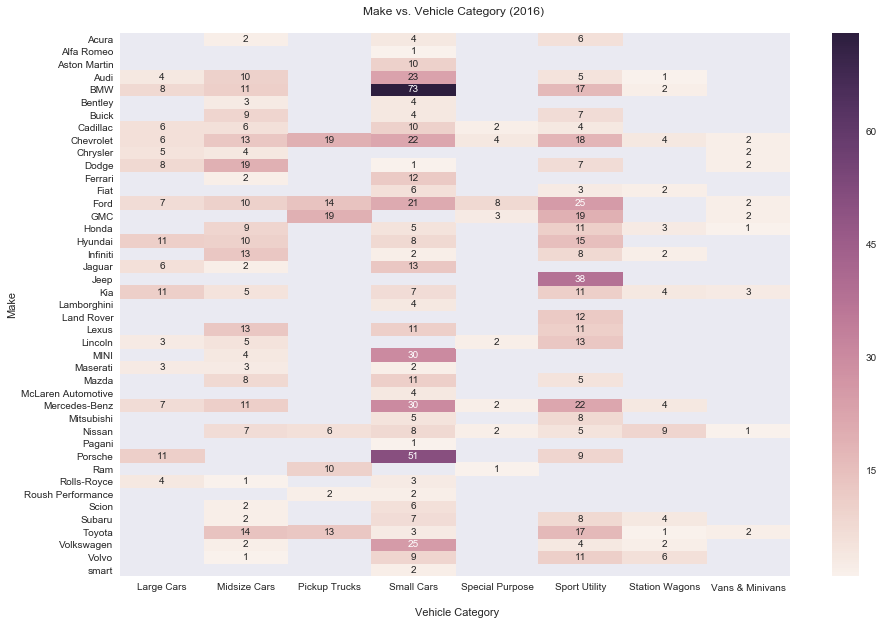

In [52]:
effic_size_pivot = pivot_count(vehicles_2016, 'Make','Vehicle Category','Combined MPG')

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(effic_size_pivot, annot=True, fmt='g')
ax.set(xlabel='\n Vehicle Category')
sns.plt.title('Make vs. Vehicle Category (2016) \n')

In [53]:
def multi_line(df, x, y):
    ax = df.groupby([x, y]).size().unstack(y).plot(figsize=(15,8), cmap="Set2")

Text(0.5,1,'Vehicle Categories Over Time \n')

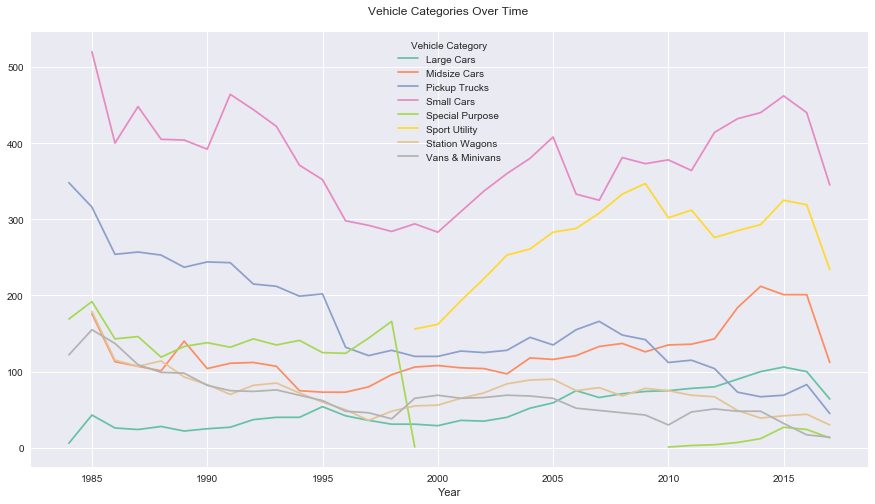

In [54]:
multi_line(vehicles, 'Year', 'Vehicle Category')
ax.set(xlabel='\n Year')
sns.plt.title('Vehicle Categories Over Time \n')

Clearly, small cars are significantly more in numbers throughout, although is sees a downtime during late 90's. Special purpose cars are taken away before entering millenium year and SUVs were introduced then. There is one interesting thing that can be seen from this data is BMW cars are decreasing in number across all categories in recent years except for vans. 

Text(0.5,1,'BMW Vehicle Categories Over Time \n')

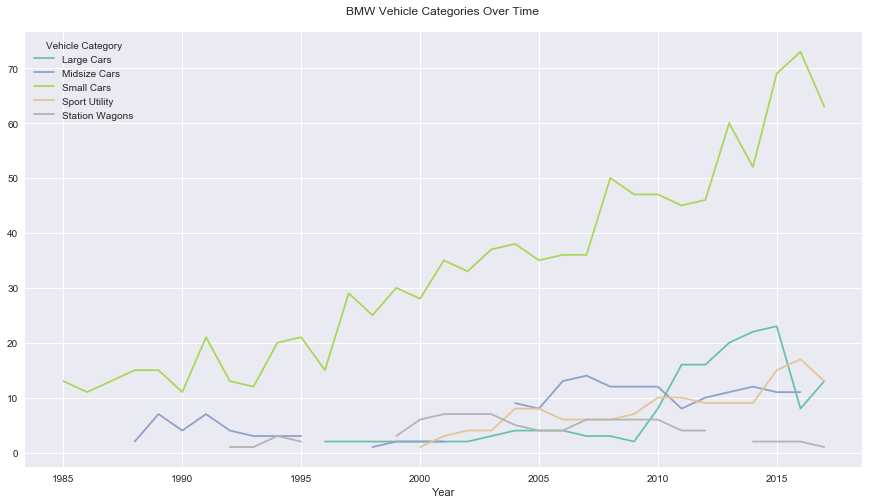

In [55]:
# Take a look at the way BMW is introducing cars in market
bmw = vehicles[vehicles['Make'] == 'BMW']

multi_line(bmw, 'Year', 'Vehicle Category')
ax.set(xlabel='\n Year')
sns.plt.title('BMW Vehicle Categories Over Time \n')

Text(0.5,1,'Toyota Vehicle Categories Over Time \n')

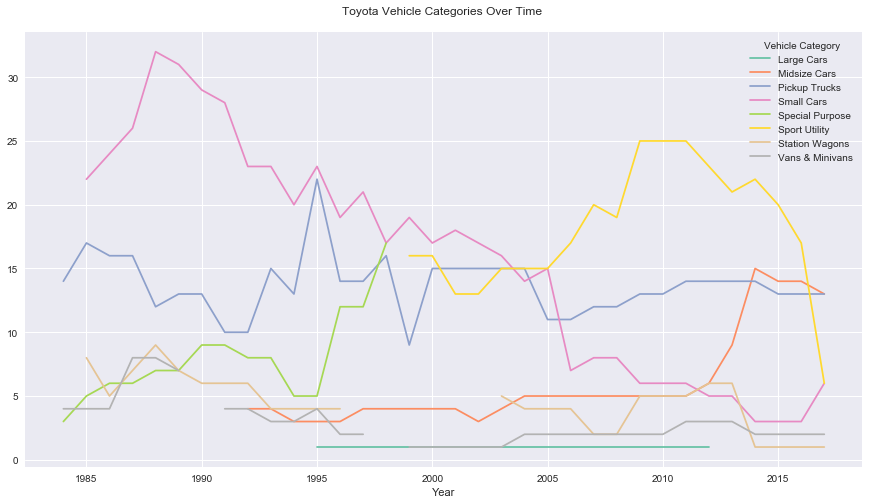

In [56]:
# Compare the above result with another make
toyota = vehicles[vehicles['Make'] == 'Toyota']

multi_line(toyota, 'Year', 'Vehicle Category')
ax.set(xlabel='\n Year')
sns.plt.title('Toyota Vehicle Categories Over Time \n')

This tells that Toyota declined to make small cars subsequently and gave more emphasis on SUVs. But recent years saw a steep drop in SUVs and increase in small cars again.

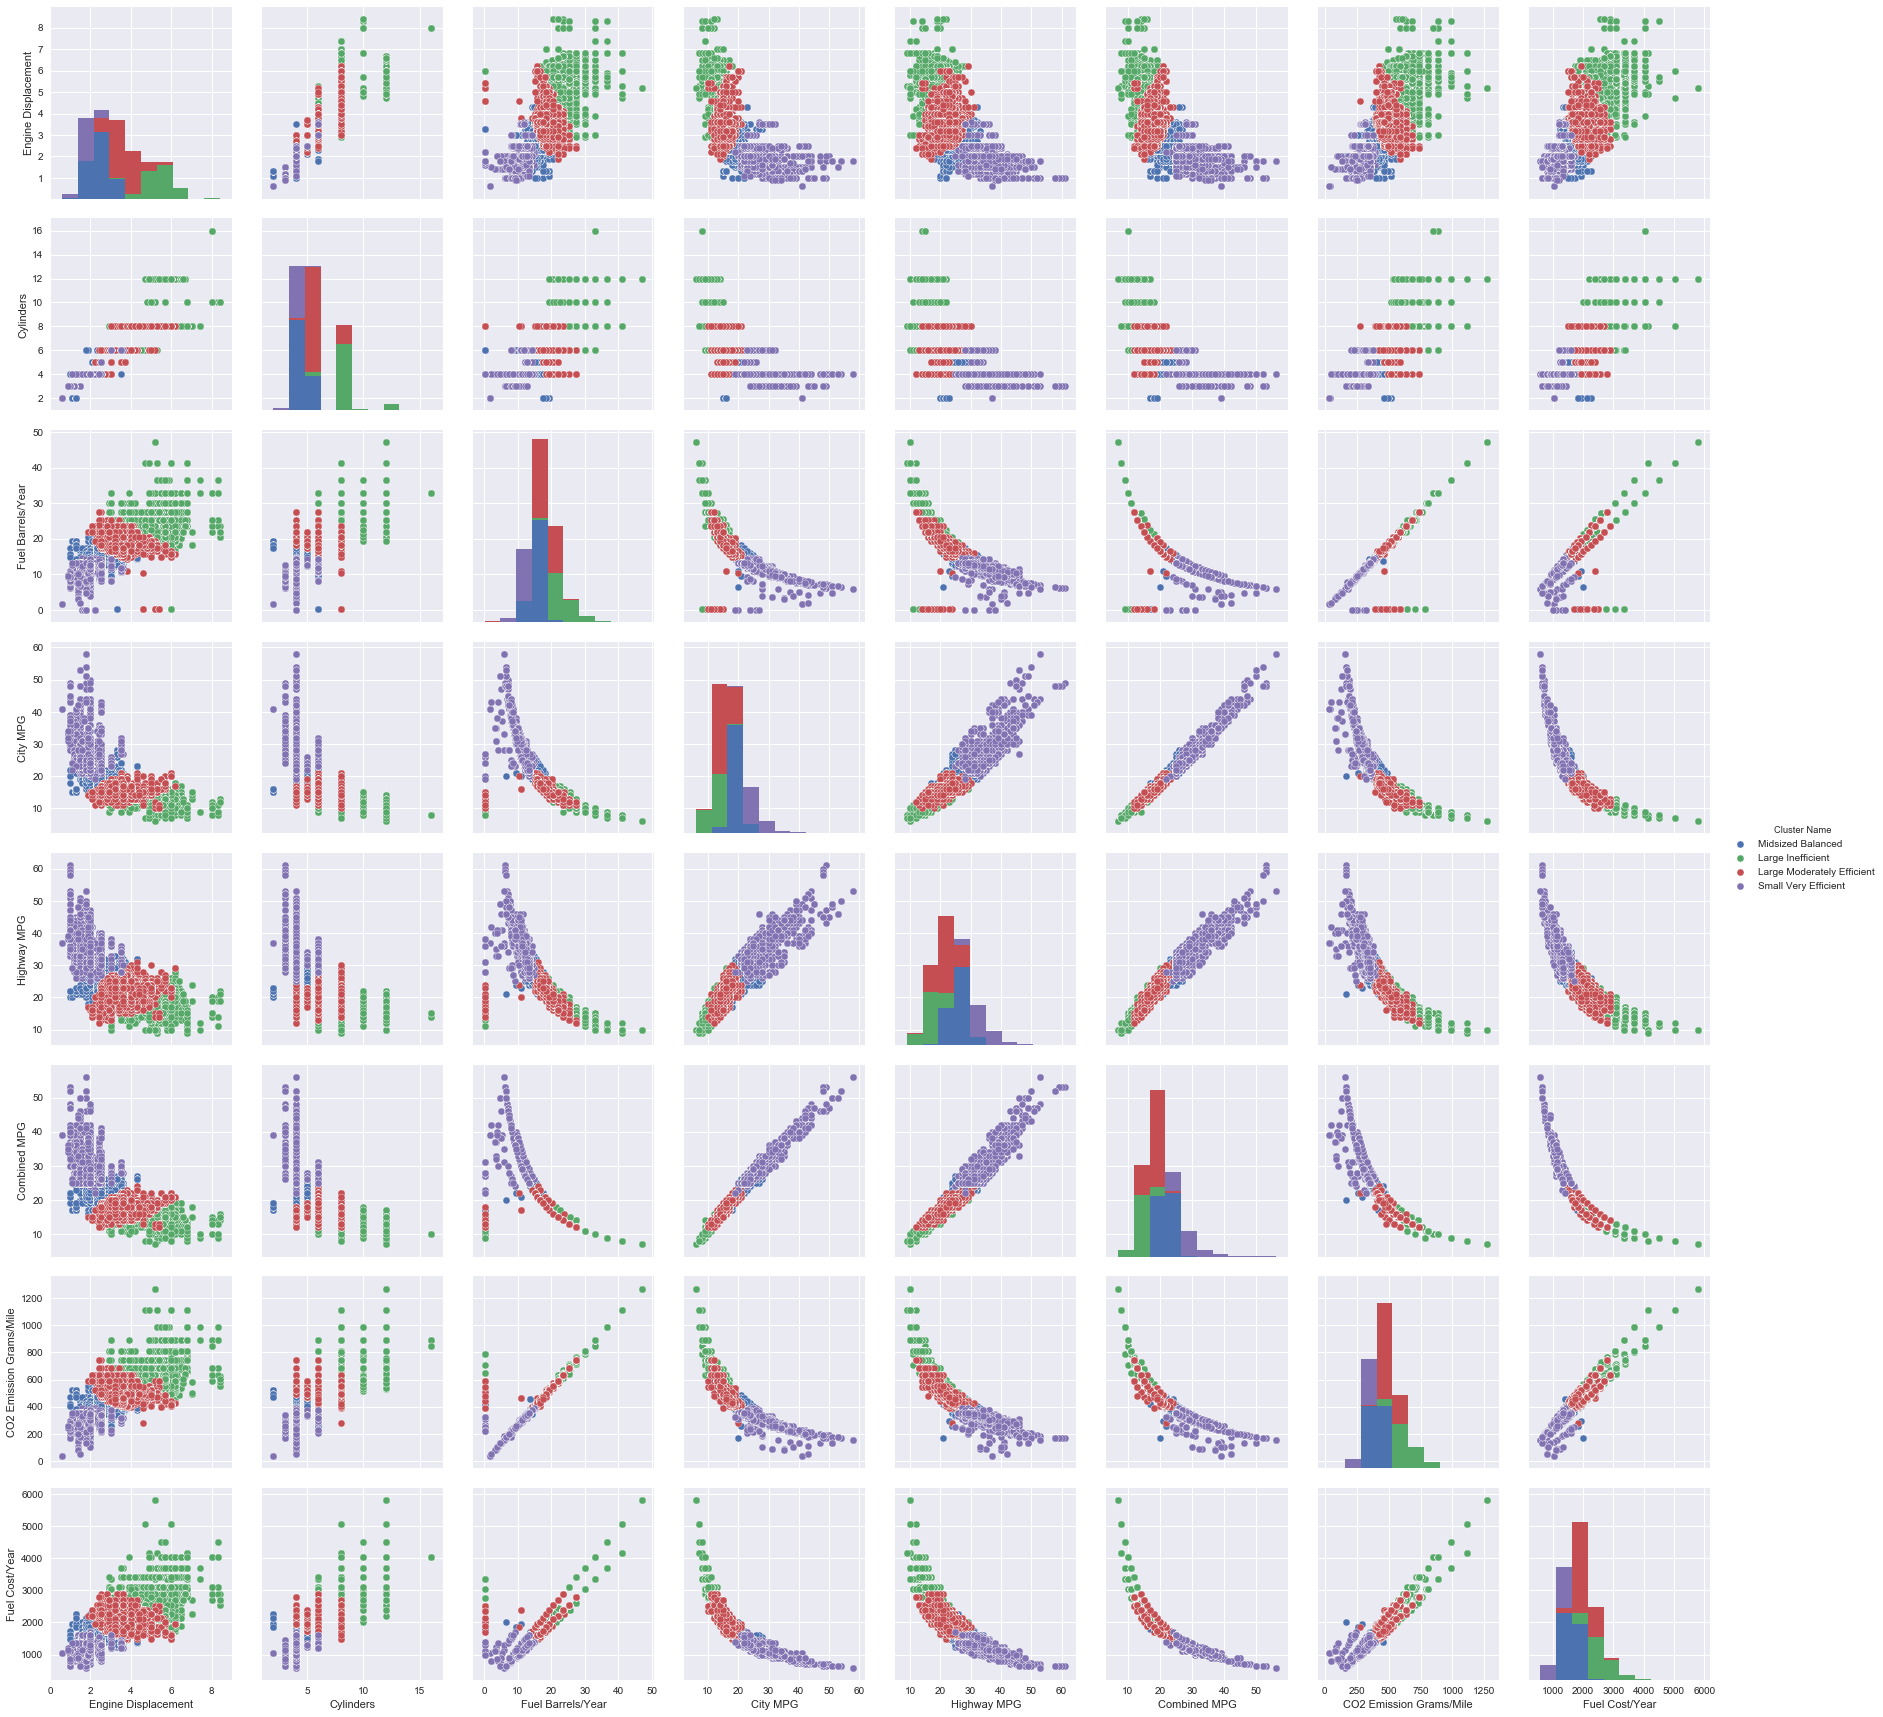

In [57]:
# Finding the correlation among variables
select_columns = ['Engine Displacement','Cylinders','Fuel Barrels/Year','City MPG','Highway MPG','Combined MPG',
                   'CO2 Emission Grams/Mile', 'Fuel Cost/Year', 'Cluster Name']

sns.pairplot(vehicles[select_columns], hue='Cluster Name', size=3)

There is quite a lot of linear and exponential correlation between variables. This is interesting to know which attributes are useful for understanding the fuel efficiency

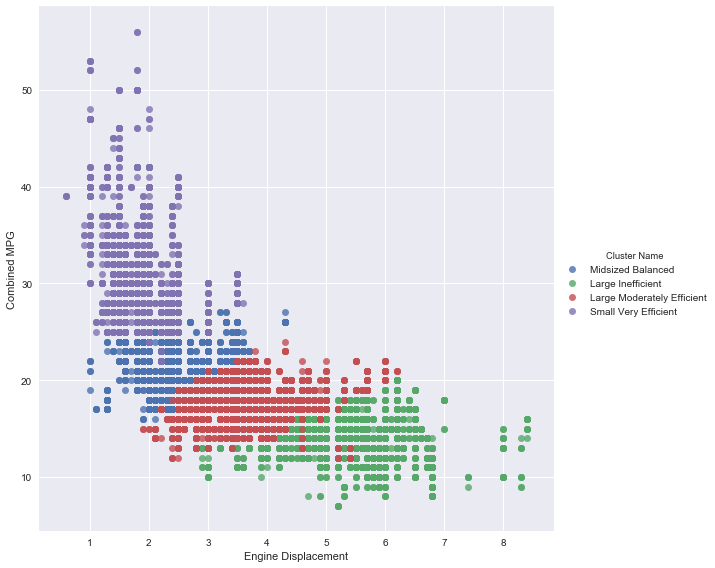

In [58]:
# Taking a closer look at one of these grid
sns.lmplot('Engine Displacement', 'Combined MPG', data=vehicles, hue='Cluster Name', size=8, fit_reg=False)

These are the various kind of explorations we can do and gain insight from it. You can try these methods to analyse the rest of the variables and drill them down by filtering data. For instance in above plot we can see few red dots mixing with green, so those red dots can be given a deeper look and so on.<br\>
Happy Analysis !!!